# Scraping Spotify to Retrieve Moderat's Albums, Songs, and Song Popularity

In [39]:
# import packages
import os
import json
import requests
import pandas as pd
import getpass
from dotenv import load_dotenv
from IPython.display import Image

### Create variables for API credentials

In [43]:
load_dotenv()
client_id = os.getenv('SPOTIFY_CLIENT_ID')
client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')

### Functions for:
1. obtaining access token
2. using access token to pull data

In [103]:
def get_access_token(client_id: str, client_secret: str, grant_type: str = 'client_credentials'):
    url = 'https://accounts.spotify.com/api/token?grant_type={}&client_id={}&client_secret={}'.format(grant_type, client_id, client_secret)
    response = requests.post(url, headers={'Content-Type':'application/x-www-form-urlencoded'})
    access_token = 'Bearer ' + json.loads(response.text)['access_token']

    return access_token

# get access token
grant_type = 'client_credentials'
client_id = os.getenv('SPOTIFY_CLIENT_ID')
client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')
access_token = get_access_token(client_id, client_secret, grant_type)

def get_data(url: str, access_token: str, verbose: bool = False):
    response = requests.get(url, headers={'Authorization': access_token})
    result = json.loads(response.text)

    if verbose:
        print('Response body:\n', result)

    return result

### Create data frame
We start by inputting the spotify ID of our artist. In this case, the artist is Moderat and the ID can be found by searching for the artist on spotify, as per the image below. The following cells then create a data frame, with all of the artist's albums and songs on Spotify, as well as song popularity. 

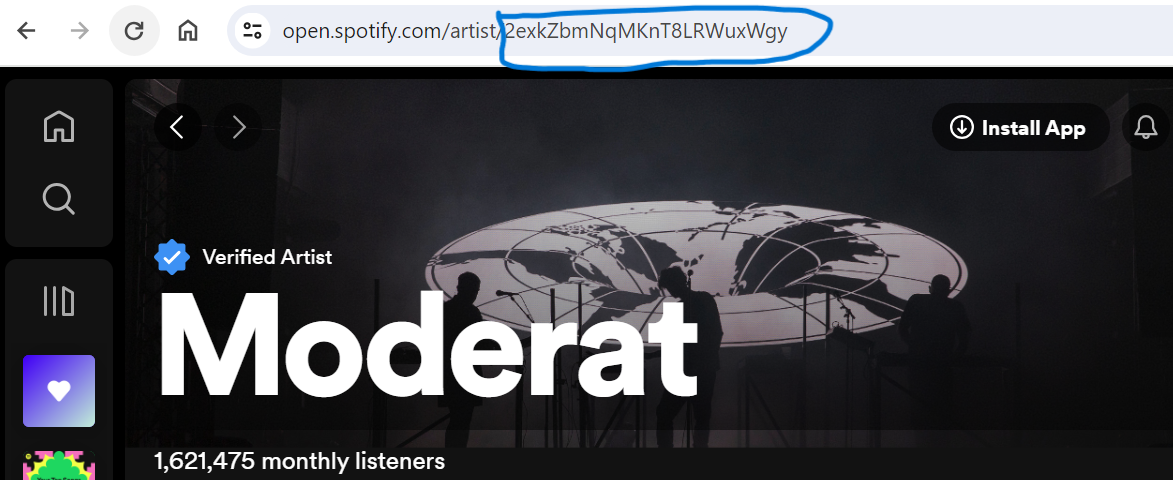

In [2]:
Image(filename='pic.png')

In [ ]:
artist_id = "2exkZbmNqMKnT8LRWuxWgy"

In [ ]:
url = 'https://api.spotify.com/v1/artists/'.format(artist_id)+'/albums'
search_item = get_data(url, access_token)

In [106]:
albums_temp = []
album_ids = []
for album in range(len(search_item['items'])):
    albums_temp.append({'album': search_item['items'][album]['name']})
    album_ids.append(search_item['items'][album]['id'])

In [139]:
tracks = []
albums=[]
song_ids = []
album_count=0
for id in album_ids:
    url = 'https://api.spotify.com/v1/albums/{}'.format(id)
    search_item = get_data(url, access_token)
    for track in range(len(search_item['tracks']['items'])):
        albums.append(albums_temp[album_count])
        tracks.append(search_item['tracks']['items'][track]['name'])
        song_ids.append(search_item['tracks']['items'][track]['id'])
    album_count+=1

In [132]:
df = pd.DataFrame(data=albums)

df['tracks'] = tracks

In [148]:
popularity = []
for id in song_ids:
    url = 'https://api.spotify.com/v1/tracks/{}'.format(id)
    search_item = get_data(url, access_token)
    popularity.append(search_item['popularity'])

df['track_popularity'] = popularity

### Take a look at the first 10 rows

In [151]:
df.head(10)

,album,tracks,popularity
111,More Love (Rampa &ME Remix),More Love - Rampa &ME Remix,67
96,Moderat,A New Error,62
78,II,Bad Kingdom,61
70,III (Deluxe Edition),The Fool,56
97,Moderat,Rusty Nails,54
...,...,...,...
55,III (Remixes),"Invaluable Waste from the Outlying Districts, ...",8
95,50 Weapons of Choice # 2-9,Art & Cash - Roska Remix,8
91,50 Weapons of Choice # 2-9,Rusty Nails - Shackleton Remix,7
125,Running,Running - Shed Remix,7
